In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage as ndi

In [2]:
os.getcwd()

'/home/jaeho_ubuntu/Lung/notebook'

In [3]:
IMAGE_DIR = '/home/LUNG_DATA/Image'
MASK_DIR = '/home/LUNG_DATA/Mask'
CLEAN_DIR_IMG ='/home/LUNG_DATA/Clean/Image'
CLEAN_DIR_MASK ='/home/LUNG_DATA/Clean/Mask'
PREDICT_DIR = '/home/LUNG_DATA/Unet_output_data/UNET_with_Augmenetation'

In [4]:
pid_list = os.listdir(PREDICT_DIR)

In [5]:
pid_list[0]

'0385_nodule0_slice14_predict.npy'

In [6]:
def view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR):
    
    for prediction in os.listdir(PREDICT_DIR):
        pid = 'LIDC-IDRI-'+prediction[:4]
        mask_id = prediction[:-12].replace('nodule','mask')
        
        original_img= np.load(IMAGE_DIR+'/'+pid+'/'+prediction[:-12]+'.npy')
        mask_img= np.load(MASK_DIR+'/'+pid+'/'+mask_id+'.npy')
        predict_mask =np.load(PREDICT_DIR+'/'+prediction)

        fig,ax = plt.subplots(1,3, figsize=(15,15))
        print(pid)
        ax[0].title.set_text('Original image')
        ax[0].imshow(original_img)
        ax[0].grid()
        ax[1].title.set_text('Mask image')
        ax[1].imshow(mask_img)
        ax[1].grid()
        ax[2].title.set_text('Predicted Mask image')
        ax[2].imshow(predict_mask)
        ax[2].grid()
        plt.show()


LIDC-IDRI-0385


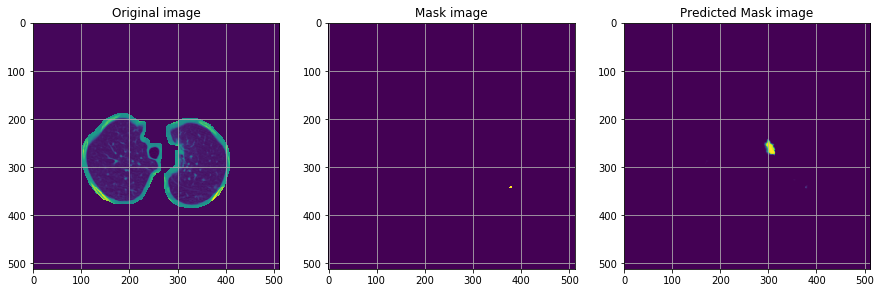

LIDC-IDRI-0741


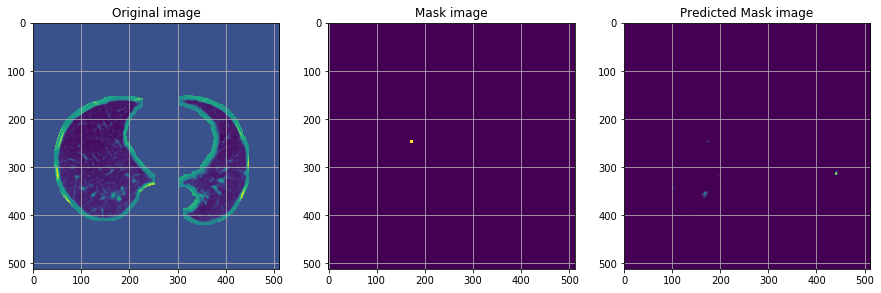

LIDC-IDRI-0845


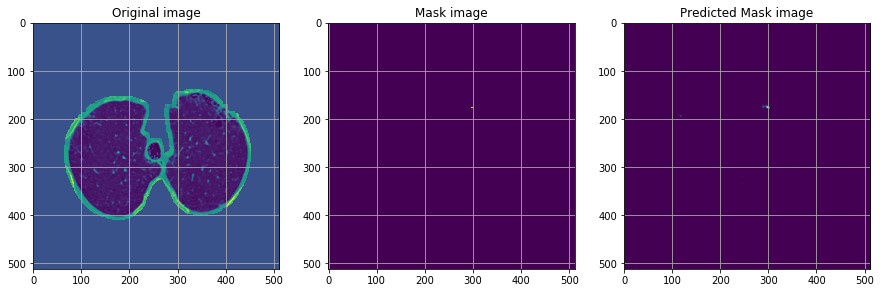

LIDC-IDRI-0415


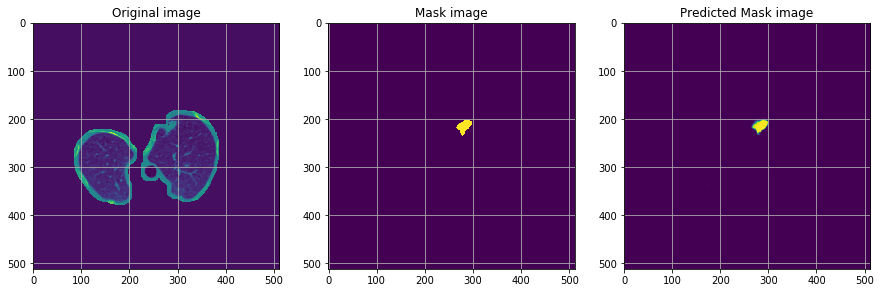

LIDC-IDRI-0844


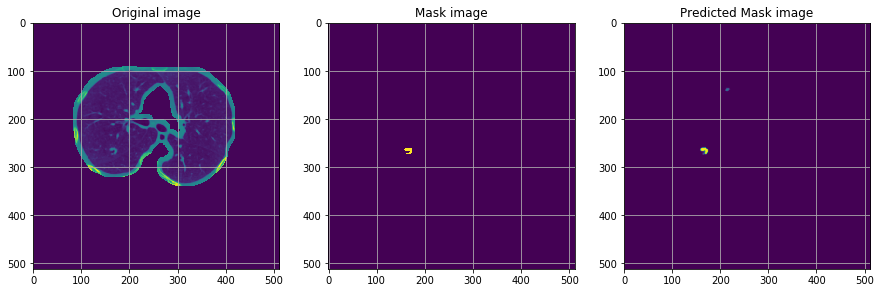

LIDC-IDRI-0810


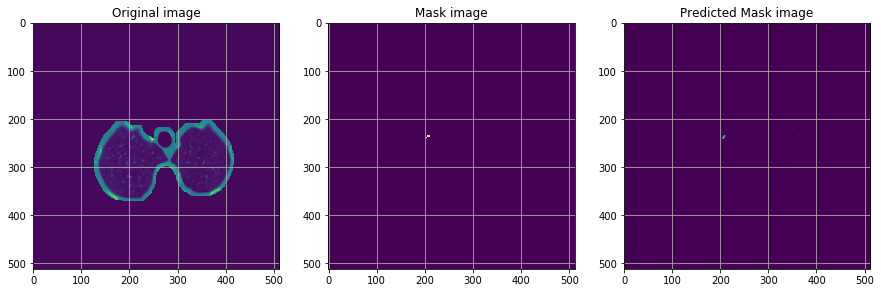

LIDC-IDRI-0698


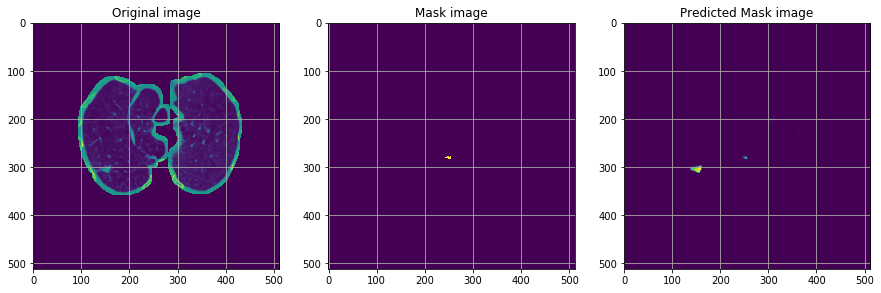

LIDC-IDRI-0686


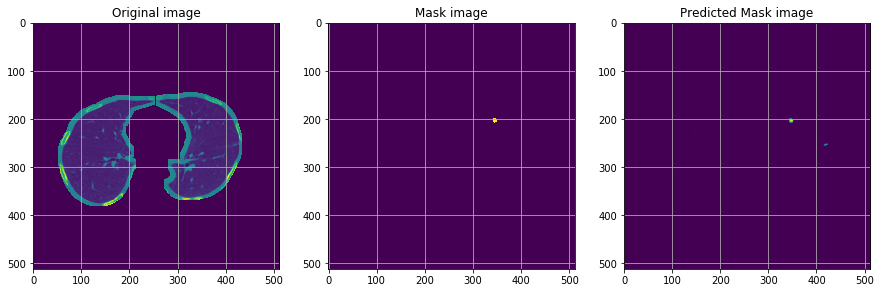

LIDC-IDRI-0332


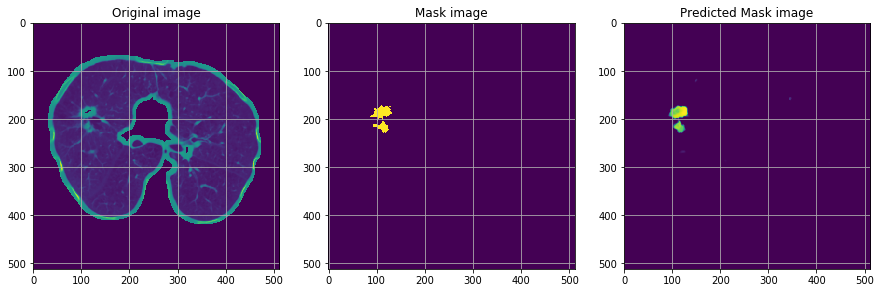

LIDC-IDRI-0806


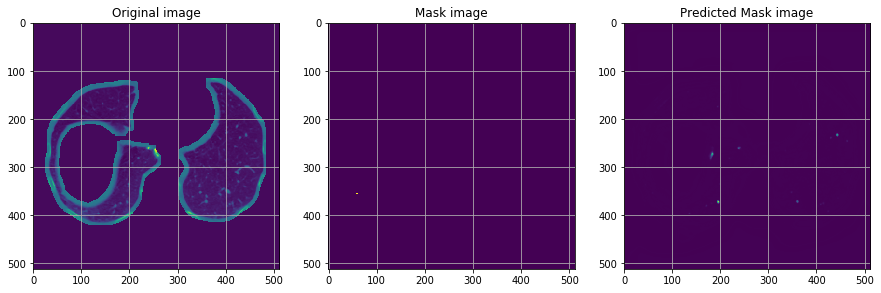

LIDC-IDRI-0752


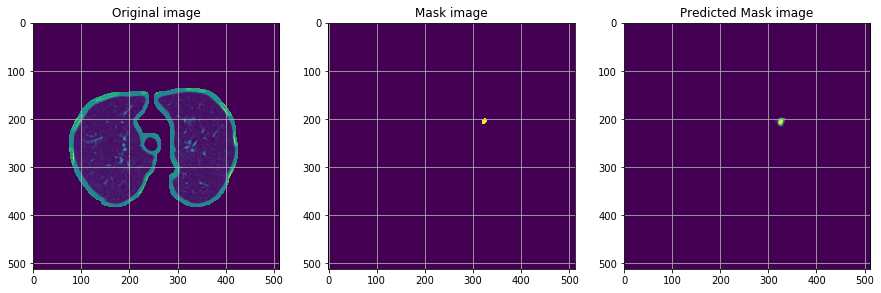

LIDC-IDRI-1003


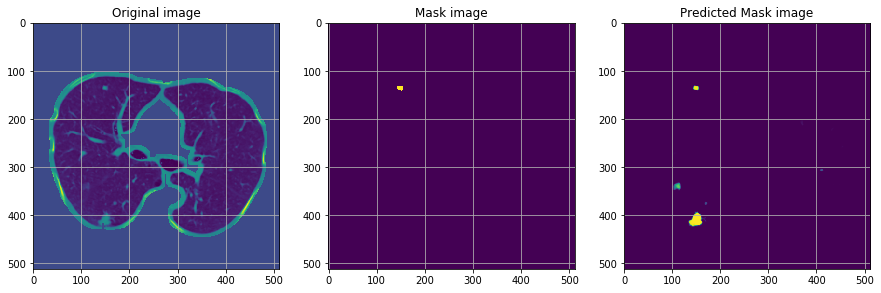

LIDC-IDRI-0702


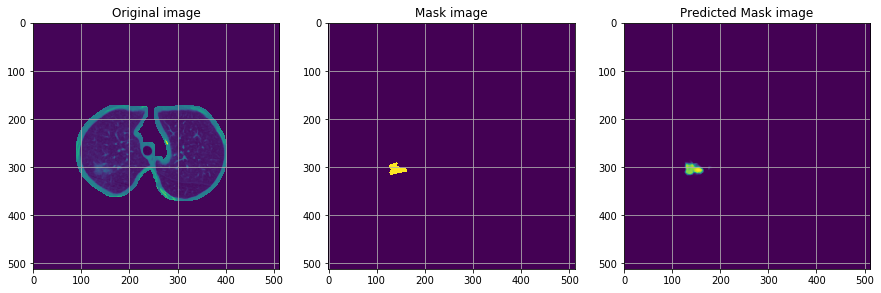

LIDC-IDRI-0994


KeyboardInterrupt: 

In [7]:
view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR)

In [7]:
pid_list[:20]

['0385_nodule0_slice14_predict.npy',
 '0741_nodule3_slice03_predict.npy',
 '0845_nodule1_slice04_predict.npy',
 '0415_nodule7_slice19_predict.npy',
 '0844_nodule1_slice07_predict.npy',
 '0810_nodule2_slice01_predict.npy',
 '0698_nodule0_slice17_predict.npy',
 '0686_nodule3_slice01_predict.npy',
 '0332_nodule0_slice06_predict.npy',
 '0806_nodule0_slice00_predict.npy',
 '0752_nodule1_slice05_predict.npy',
 '1003_nodule5_slice02_predict.npy',
 '0702_nodule4_slice09_predict.npy',
 '0994_nodule5_slice14_predict.npy',
 '0562_nodule0_slice02_predict.npy',
 '0486_nodule1_slice03_predict.npy',
 '0499_nodule0_slice00_predict.npy',
 '0649_nodule0_slice01_predict.npy',
 '0078_nodule3_slice02_predict.npy',
 '0111_nodule4_slice01_predict.npy']

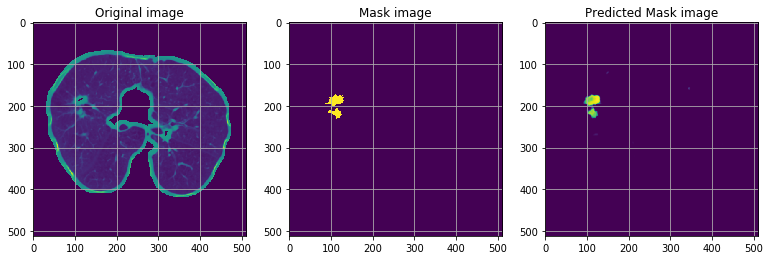

In [8]:
original = np.load(IMAGE_DIR+'/LIDC-IDRI-0332/0332_nodule0_slice06.npy')
mask = np.load(MASK_DIR+'/LIDC-IDRI-0332/0332_mask0_slice06.npy')
predict = np.load(PREDICT_DIR+'/0332_nodule0_slice06_predict.npy')
fig,ax = plt.subplots(1,3, figsize=(13,13))
ax[0].title.set_text('Original image')
ax[0].imshow(original)
ax[0].grid()
ax[1].title.set_text('Mask image')
ax[1].imshow(mask)
ax[1].grid()
ax[2].title.set_text('Predicted Mask image')
ax[2].imshow(predict)
ax[2].grid()

In [9]:
def crop_nodule(coord,image,dim=32):
    """
    Returns a cropped image of size 224 x 224 when dim is kept 112. There are corner cases
    
    Args:
    coord: coordinate of x,y as list or tuple. For COM the input is as (y coord, x coord)
    image: image to be cropped
    dim: Size of the image after being cropped
    
    Returns:
    Cropped Image
    
    """
    x_coord = int(coord[1])
    y_coord = int(coord[0])
    #print(x_coord,y_coord)
    #print(coord[0]-dim,coord[0]+dim,coord[1]-dim,coord[1]+dim)
    
    

    return image[y_coord-dim:y_coord+dim,x_coord-dim:x_coord+dim]

In [10]:
ndi.center_of_mass(mask)

(197.53549517966695, 111.64504820333042)

In [11]:
ndi.center_of_mass(predict)

(197.27844073598493, 119.18674498223672)

In [12]:
def crop_patch(image,mask):
    return crop_nodule(ndi.center_of_mass(mask),image)
    

In [13]:
patch= crop_patch(original,mask)

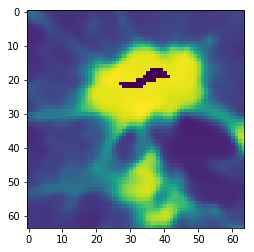

In [14]:
plt.imshow(patch)

In [15]:
from scipy import signal

xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])
xder2 = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder2 = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])

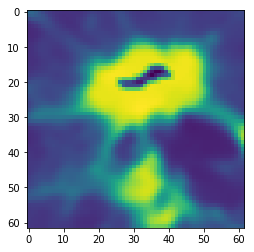

In [16]:
plt.imshow(signal.convolve2d(patch,smooth,mode='valid'))

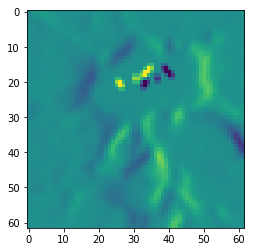

In [17]:
plt.imshow(signal.convolve2d(patch,xder,mode='valid'))

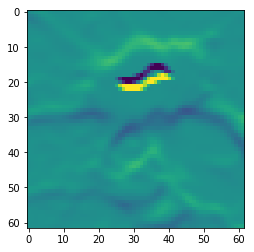

In [18]:
plt.imshow(signal.convolve2d(patch,yder,mode='valid'))

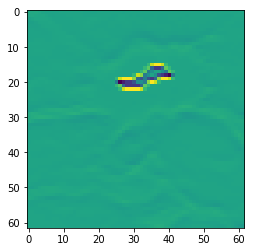

In [19]:
plt.imshow(signal.convolve2d(patch,yder2,mode='valid'))

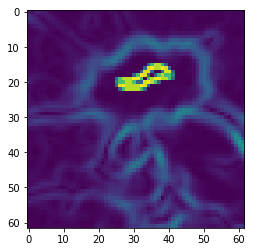

In [20]:
arrx = signal.convolve2d(patch,xder,mode='valid')
arry = signal.convolve2d(patch,yder,mode='valid')
plt.imshow(np.hypot(arrx,arry))

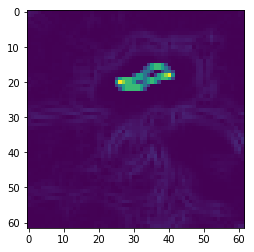

In [21]:
arrx = signal.convolve2d(patch,xder2,mode='valid')
arry = signal.convolve2d(patch,yder2,mode='valid')
plt.imshow(np.hypot(arrx,arry))

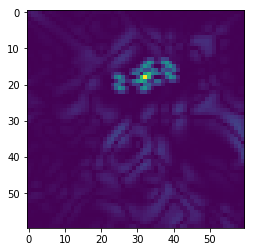

In [22]:
arrx = signal.convolve2d(patch,xder,mode='valid')
arry = signal.convolve2d(patch,yder,mode='valid')
arrx = signal.convolve2d(arrx,yder,mode='valid')
arry = signal.convolve2d(arry,xder,mode='valid')
plt.imshow(np.hypot(arrx,arry))

In [ ]:
def create_tp_coordinates(mask_answer_dir,patient_list):
    """ Creates dataframe storing TP coordinates"""
    df= pd.DataFrame(index=[],columns= ['file_name','nodule_no','tp_x_coord','tp_y_coord'])
    
    for file in patient_list:
        mask = np.load(mask_answer_dir+file)        
        try:
            com = ndi.center_of_mass(mask)
            tmp = pd.Series([file,1,int(com[1]),int(com[0])],index=['file_name','nodule_no','tp_x_coord','tp_y_coord'])
            df = df.append(tmp,ignore_index=True)
        except ValueError:
            #ValueError occurs because the answer sheet doesn't contain any nodule
            #There are answer sheet like these because the U-Net predicted there is a nodule
            continue
            
    return df